In [16]:
from langchain import OpenAI
from langchain.chains import ConversationChain
from getpass import getpass

# f = open('../keys/openai_api_key.txt')
# api_key = f.read()
# print(api_key)

openai_api_key = getpass()

In [18]:
llm = OpenAI(
    temperature = 0,
    openai_api_key = openai_api_key,
    model_name = 'text-davinci-003'
)

In [19]:
conv = ConversationChain(llm=llm)

In [20]:
print(conv.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


### ConversationBufferMemory

ConversationBufferMemory를 이용한 대화 저장

- 사용자 input을 모두 저장
- 저장된 내용을 직관적으로 확인 가능
- 대화가 길어질 수록 많은 누적되는 토큰에 높은 비용 소요

In [36]:
from langchain.chains.conversation.memory import ConversationBufferMemory

conv_buf = ConversationChain(
    llm=llm,
    memory=ConversationBufferMemory()
)

In [37]:
while True:
    user_input = input()
    print()
    if user_input in 'stop quit x X 종료 정지 그만':
        print('##### 대화를 종료합니다. #####\n')
        break
    print(f'Human: {user_input}')
    ai_result = conv_buf.run(user_input)
    print(f'AI:{ai_result}','\n')

print('[buffer memory]\n', conv_buf.memory.buffer)


Human: 안녕
AI: 안녕하세요! 무엇을 도와드릴까요? 


Human: 1+1이 뭐야?
AI: 1+1은 2입니다. 다른 연산을 해보고 싶으신가요? 


Human: 그 값에 2를 더해줘
AI: 3입니다. 다른 연산을 해보고 싶으신가요? 


Human: 틀렸어 2 + 2 = 4야
AI:  맞습니다. 2 + 2는 4입니다. 다른 연산을 해보고 싶으신가요? 


Human: 그 값에 2를 더해줘
AI:  4 + 2는 6입니다. 다른 연산을 해보고 싶으신가요? 


##### 대화를 종료합니다. #####

[buffer memory]
 Human: 안녕
AI:  안녕하세요! 무엇을 도와드릴까요?
Human: 1+1이 뭐야?
AI:  1+1은 2입니다. 다른 연산을 해보고 싶으신가요?
Human: 그 값에 2를 더해줘
AI:  3입니다. 다른 연산을 해보고 싶으신가요?
Human: 틀렸어 2 + 2 = 4야
AI:   맞습니다. 2 + 2는 4입니다. 다른 연산을 해보고 싶으신가요?
Human: 그 값에 2를 더해줘
AI:   4 + 2는 6입니다. 다른 연산을 해보고 싶으신가요?


### ConversationSummaryMemory

ConversationSummaryMemory를 이용한 대화 저장

- 기록된 대화를 요약해 저장
- summarization LLM 추가 필요 - 해당 LLM에 대한 리소스 또한 고려해야 함
- 대화가 적게 이루어질 때에 사용 token이 비약적으로 상승
- buffermemory에 비해 대화가 길어질수록 사용 token이 완만히 상승

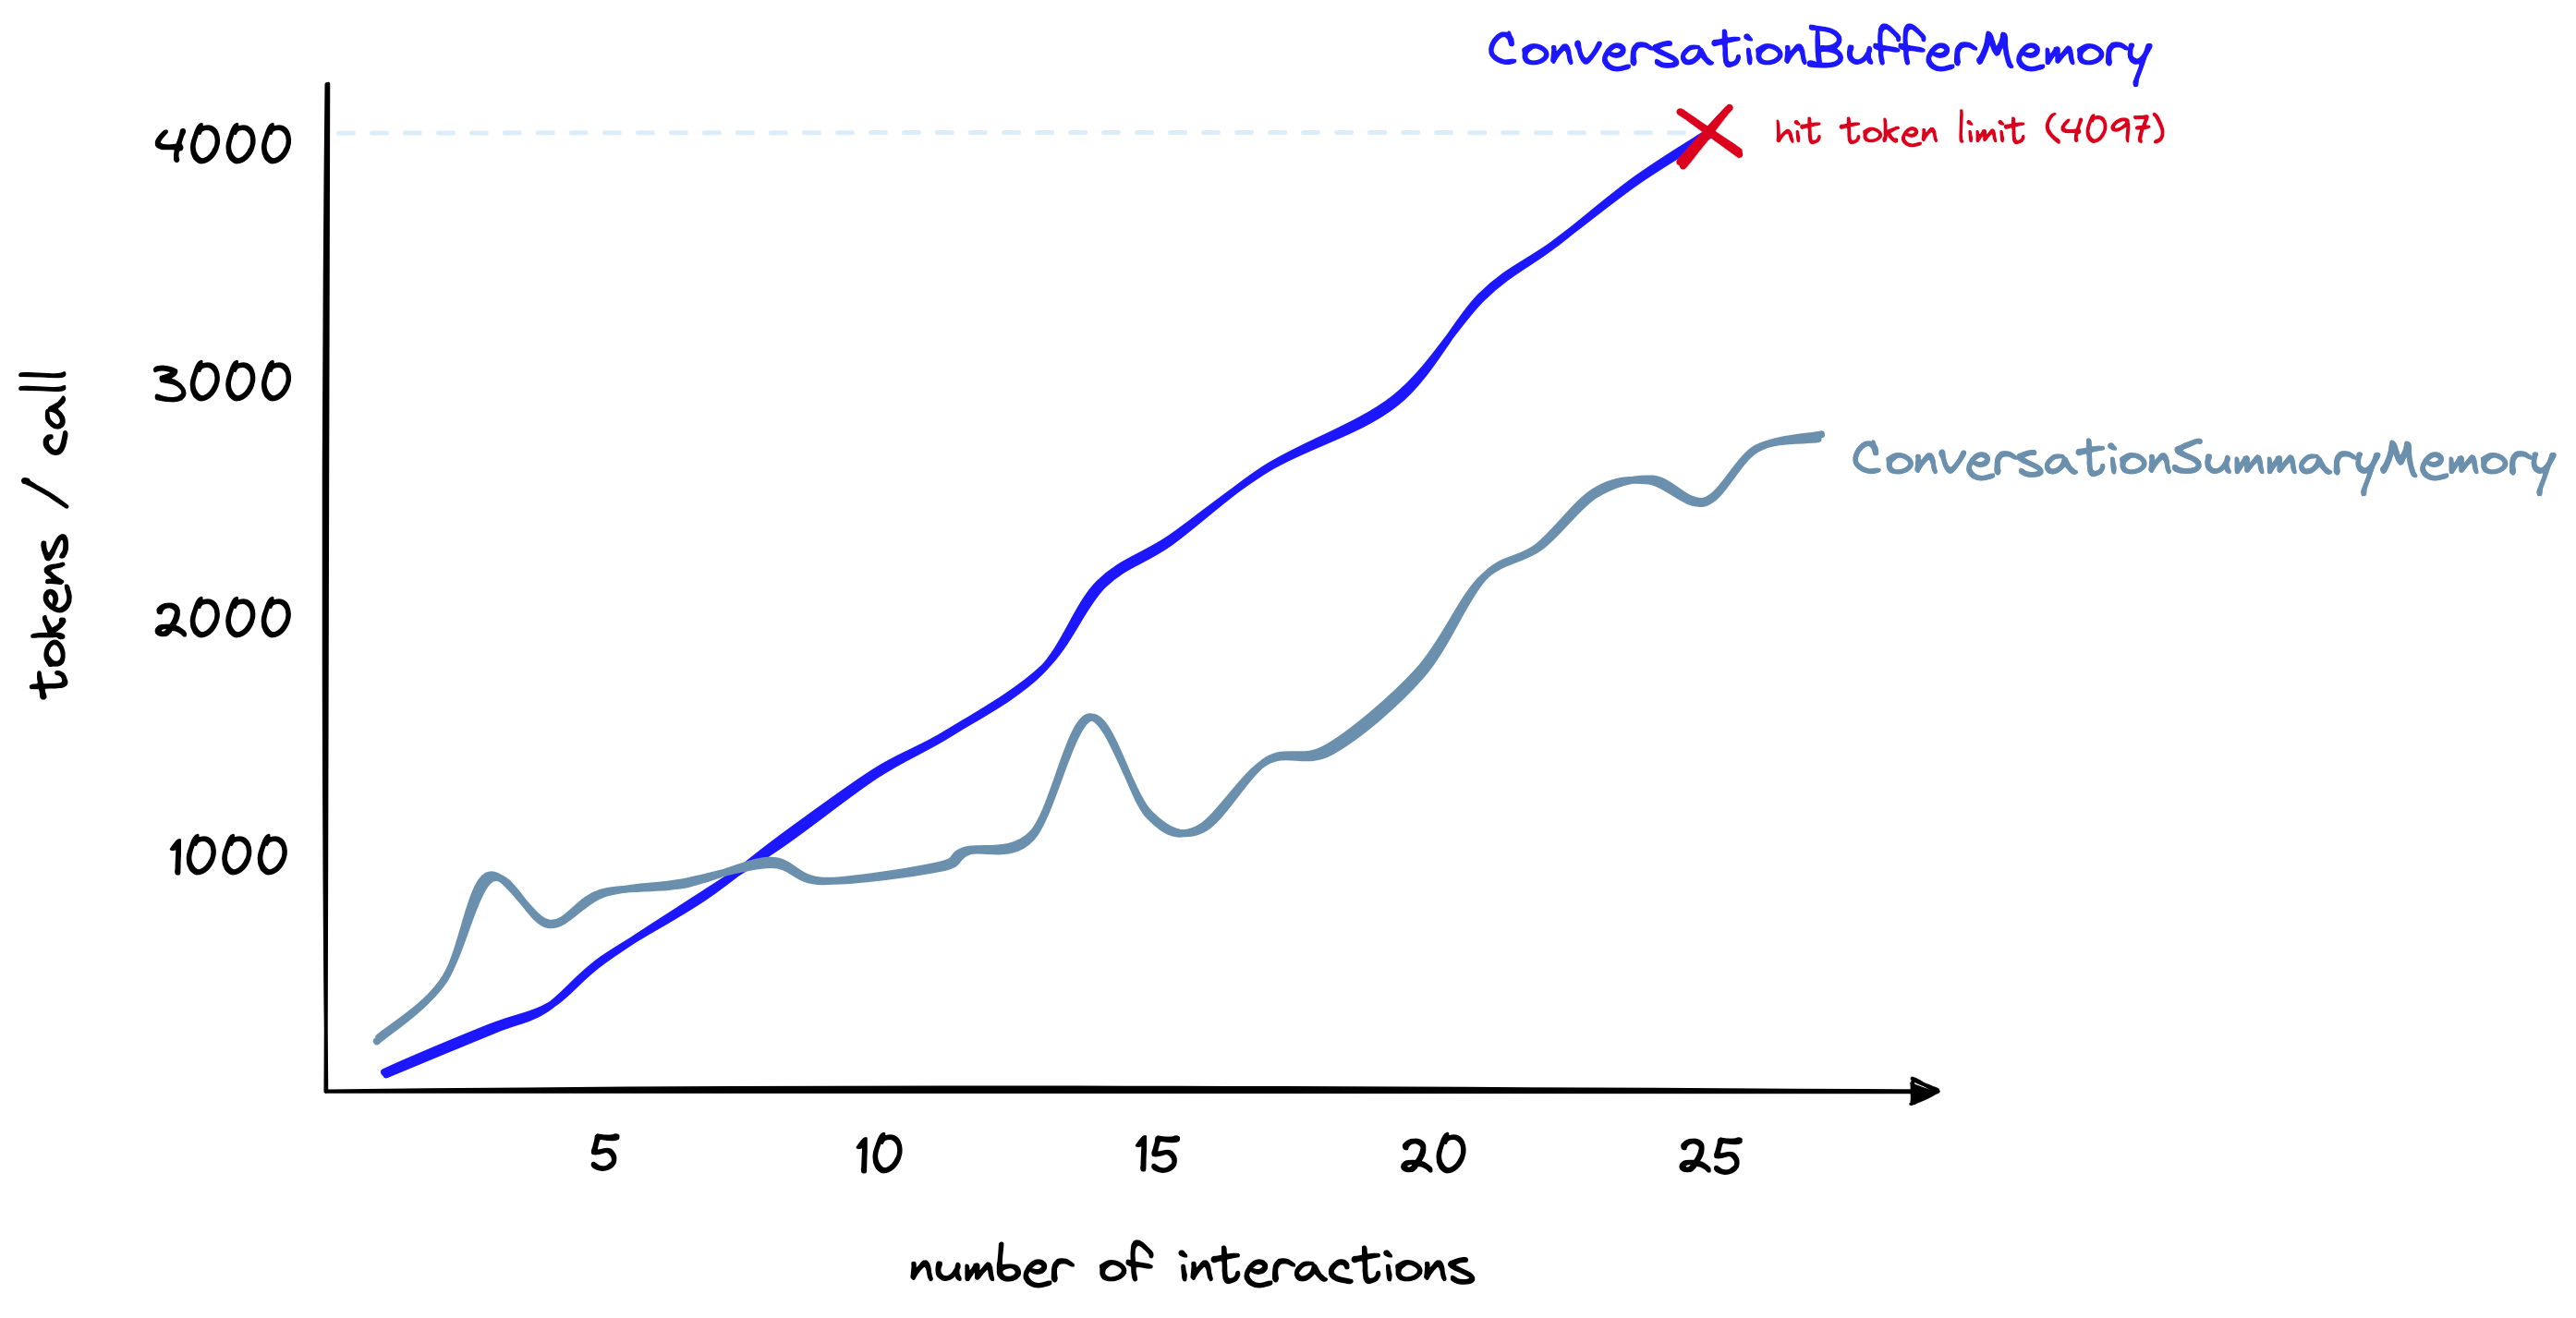

[출처](https://www.pinecone.io/learn/series/langchain/langchain-conversational-memory/)

In [40]:
from langchain.chains.conversation.memory import ConversationSummaryMemory

conv_summary = ConversationChain(
    llm=llm,
    memory=ConversationSummaryMemory(llm=llm)
)

In [41]:
while True:
    user_input = input()
    print()
    if user_input in 'stop quit x X 종료 정지 그만':
        print('##### 대화를 종료합니다. #####\n')
        break
    print(f'Human: {user_input}')
    ai_result = conv_summary.run(user_input)
    print(f'AI:{ai_result}','\n')

print('[summary memory]', conv_summary.memory.buffer)


Human: 안녕
AI: 안녕하세요! 무엇을 도와드릴까요? 


Human: 1+1이 뭐야?
AI: 1과 1의 합은 2입니다. 다른 문제를 물어보시겠어요? 


Human: 그 값에 2를 더해줘
AI: 네, 1 + 2는 3입니다. 다른 질문이 있으신가요? 


Human: 그 값에 2를 더해줘
AI: 1 + 2는 3입니다. 다른 질문이 있으신가요? 


##### 대화를 종료합니다. #####

[summary memory] 
The human greets the AI and the AI responds, asking what it can help with. The human then asks what 1+1 is, to which the AI responds that the sum is 2 and asks if the human has any other questions. The human then asks the AI to add 2 to the value, to which the AI responds that 1 + 2 is 3 and asks if the human has any other questions. The human then asks the AI to add 2 to the value, to which the AI responds that 1 + 2 is 3 and again asks if the human has any other questions.


### ConversationBufferWindowMemory

ConversationBufferWindowMemory를 이용한 대화 저장

- ConversationBufferMemory와 같이 수행
- 주어진 숫자 만큼의 대화를 저장, 그 이전의 것은 삭제
- 긴 상호작용에는 적합하지 않으며 token 수 제한을 위해 사용하는 것이 적절함

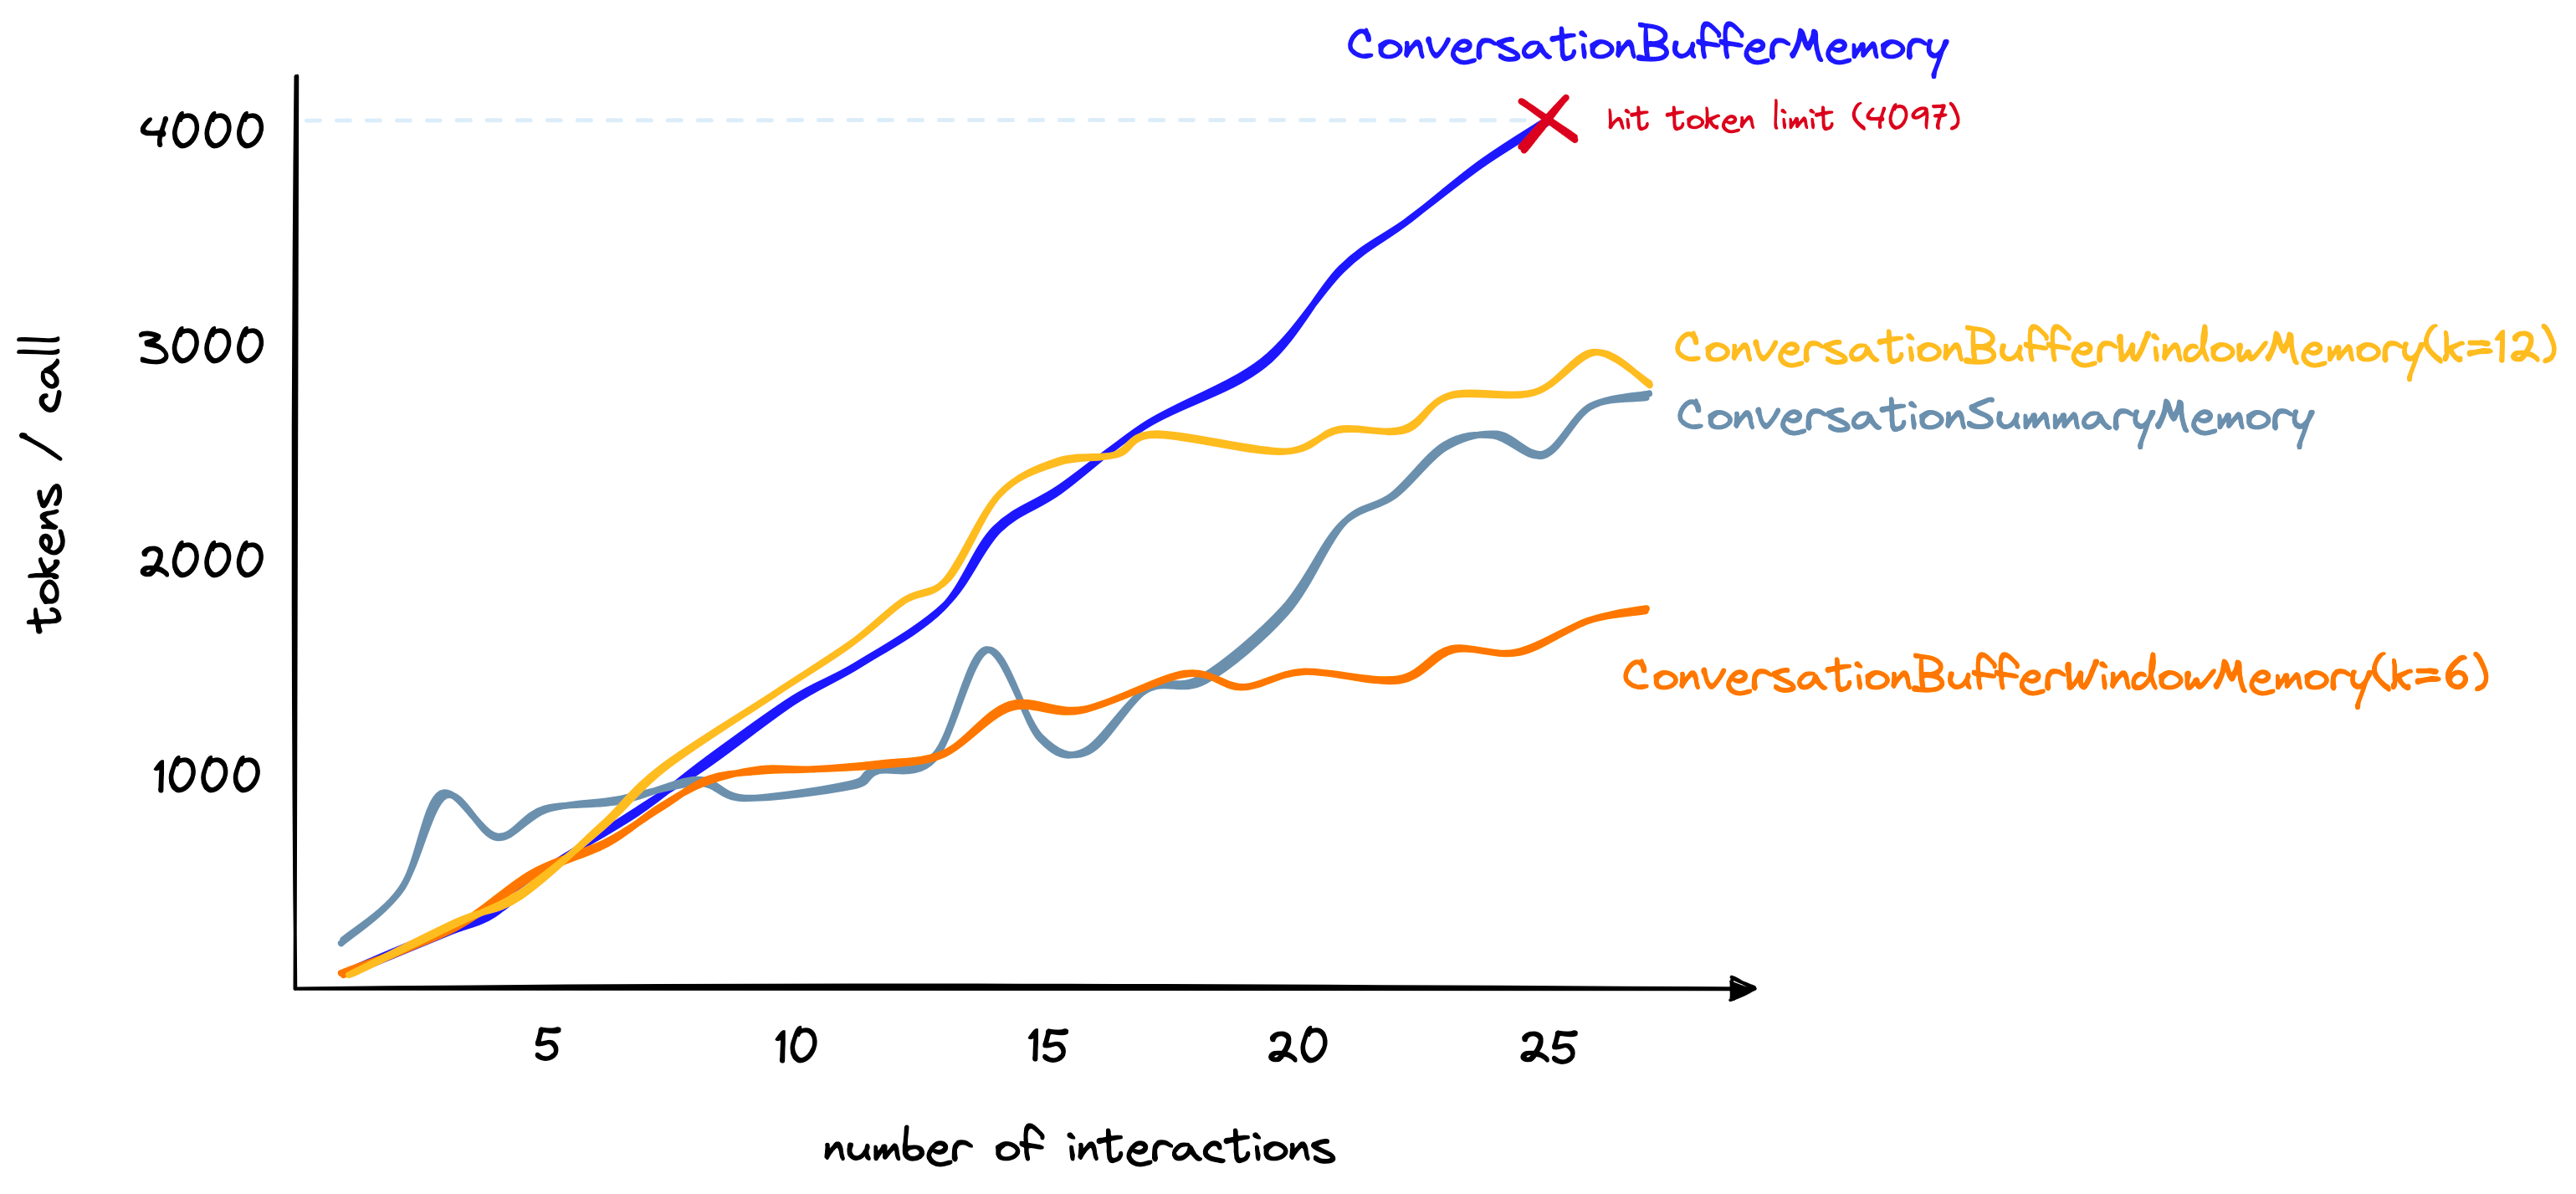

[출처](https://www.pinecone.io/learn/series/langchain/langchain-conversational-memory/)

In [42]:
from langchain.chains.conversation.memory import ConversationBufferWindowMemory

conv_bufw = ConversationChain(
    llm=llm,
    memory=ConversationBufferWindowMemory(k=2)
)

In [43]:
while True:
    user_input = input()
    print()
    if user_input in 'stop quit x X 종료 정지 그만':
        print('##### 대화를 종료합니다. #####\n')
        break
    print(f'Human: {user_input}')
    ai_result = conv_bufw.run(user_input)
    print(f'AI:{ai_result}','\n')

# print('[summary memory]', conv_bufw.memory.buffer)


Human: 안녕
AI: 안녕하세요! 무엇을 도와드릴까요? 


Human: 1+1이 뭐야?
AI: 1+1은 2입니다. 다른 연산을 해보고 싶으신가요? 


Human: 응. 2+2는 뭐야?
AI: 2+2는 4입니다. 다른 연산을 해보고 싶으신가요? 


Human: 응. 3+3은 뭐야?
AI: 3+3은 6입니다. 다른 연산을 해보고 싶으신가요? 


Human: 지금까지의 숫자를 모두 더해줘.
AI: 2+2+3+3은 10입니다. 다른 연산을 해보고 싶으신가요? 


##### 대화를 종료합니다. #####



In [44]:
bufw_his = conv_bufw.memory.load_memory_variables({})
print(bufw_his)

{'history': 'Human: 응. 3+3은 뭐야?\nAI:  3+3은 6입니다. 다른 연산을 해보고 싶으신가요?\nHuman: 지금까지의 숫자를 모두 더해줘.\nAI:  2+2+3+3은 10입니다. 다른 연산을 해보고 싶으신가요?'}


#### 위 예시

- 사용자와 AI 간의 대화를 2개만 기억하도록 memory 생성
- 사용자의 마지막 질문 기준 memory는 2+2 부터의 대화만 기록
- 마지막 대화 이후 memory는 3+3부터의 대화를 기록